# Problem statement
### using Iris data cluster flowers into different clusters based on similarity.

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [37]:
# load data
data=pd.read_csv("Iris.csv")

In [38]:
data

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [39]:
# drop unnamed column
data.drop("Unnamed: 0",axis=1,inplace=True)

In [40]:
data.shape

(150, 5)

In [41]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [43]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [44]:
data.target.unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='petal_length', ylabel='petal_width'>

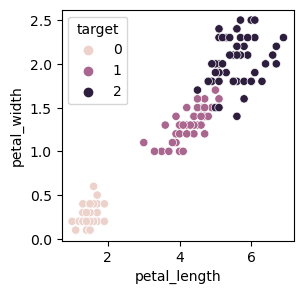

In [45]:
# EDA
plt.figure(figsize=(3,3))
sns.scatterplot(data=data,x="petal_length",y="petal_width",hue="target")

# Data preprocessing

In [46]:
# check for missing values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [47]:
#check for duplicates
data.duplicated().sum()

3

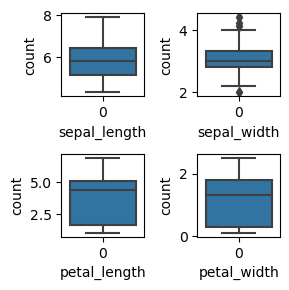

In [48]:
# check for outliers
plt.figure(figsize=(3,3))
plotnumber=1

for column in data.drop('target',axis=1):
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        plt.ylabel("count")
    plotnumber+=1
plt.tight_layout()

In [49]:
# we see outliers in sepal_width.
#first check distribution if its normal go with 3 sigma rule or else go with IQR

<Axes: xlabel='sepal_width', ylabel='Count'>

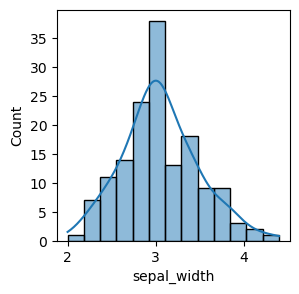

In [50]:
plt.figure(figsize=(3,3))
sns.histplot(data=data,x="sepal_width",kde=True)

In [51]:
* Clearly we see outliers in sepal_width column and sistribution of sepalwidth is normal
will use 3-sigma rule to identify the outliers.
* Replace outliers with mean since data is normal.

SyntaxError: invalid syntax (97153795.py, line 1)

In [ ]:
# 3 sigma rule
low_limit=data["sepal_width"].mean()-3*data["sepal_width"].std()
upper_limit=data["sepal_width"].mean()+3*data["sepal_width"].std()
print("lower limit",low_limit)
print("upper_limit",upper_limit)

In [52]:
# find values less than lower limit
data.loc[data["sepal_width"]<low_limit]

,sepal_length,sepal_width,petal_length,petal_width,target


In [53]:
# find values greater than upper limit
data.loc[data["sepal_width"]>upper_limit]

,sepal_length,sepal_width,petal_length,petal_width,target
15,5.7,4.4,1.5,0.4,0


In [54]:
#replace outlier with mean
data.loc[data["sepal_width"]>upper_limit,"sepal_width"]=data["sepal_width"].mean()

<Axes: xlabel='sepal_width'>

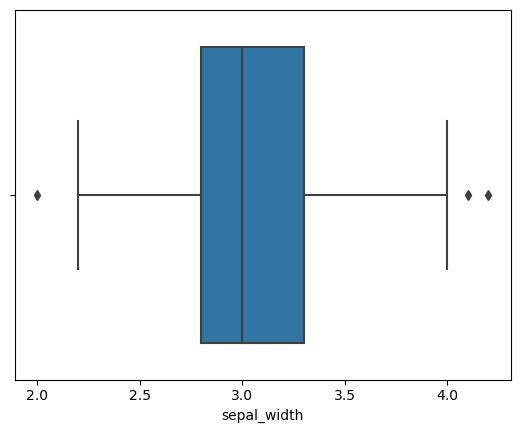

In [55]:
sns.boxplot(data=data,x='sepal_width')

In [56]:
# go with the IQR method to remove outlairs .here for example we used 3-sigma

### Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
data.iloc[:,:-1]=scaling.fit_transform(data.iloc[:,:-1])


In [58]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.088864,-1.341272,-1.312977,0
1,-1.143017,-0.107760,-1.341272,-1.312977,0
2,-1.385353,0.370890,-1.398138,-1.312977,0
3,-1.506521,0.131565,-1.284407,-1.312977,0
4,-1.021849,1.328189,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.107760,0.819624,1.447956,2
146,0.553333,-1.304384,0.705893,0.922064,2
147,0.795669,-0.107760,0.819624,1.053537,2
148,0.432165,0.849539,0.933356,1.447956,2


In [61]:
# remove target from data
x=data.drop("target",axis=1)

# Apply kmeans model

In [64]:
# import kmeams model
from sklearn.cluster import KMeans
# initialise the model
model=KMeans(n_clusters=6,random_state=2)
# train model
model.fit(x)

KMeans(n_clusters=6, random_state=2)

In [65]:
#  centroids -cluster centers
# no of clusters is same as number of centroids
model.cluster_centers_

array([[-3.64080601e-01, -1.44114126e+00,  1.07449102e-01,
         1.75297293e-03],
       [ 1.85925366e+00, -4.80043087e-01,  1.41355503e+00,
         1.03892863e+00],
       [-7.56211786e-01,  1.45705628e+00, -1.29752956e+00,
        -1.21690033e+00],
       [ 1.10585876e+00,  4.57046629e-01,  1.01751700e+00,
         1.19552754e+00],
       [-1.29447675e+00,  1.46921521e-01, -1.31283955e+00,
        -1.29654261e+00],
       [ 3.10997534e-01, -4.05586469e-01,  5.51723697e-01,
         5.21801610e-01]])

In [68]:
model.labels_

array([2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 3, 5, 3, 0, 5, 5, 3, 0, 5, 0, 0, 5, 0, 5, 5, 5,
       5, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5, 5, 5, 0,
       5, 0, 0, 5, 0, 0, 0, 5, 5, 5, 0, 5, 3, 5, 1, 5, 3, 1, 0, 1, 1, 3,
       3, 5, 3, 5, 5, 3, 3, 3, 1, 0, 3, 5, 1, 5, 3, 3, 5, 5, 5, 1, 1, 3,
       5, 5, 5, 1, 3, 3, 5, 3, 3, 3, 5, 3, 3, 3, 5, 3, 3, 5])

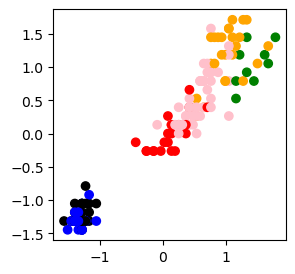

In [70]:
# Visualize the cluster created by model
plt.figure(figsize=(3,3))
color_schema=np.array(["red","green","black","orange","blue","pink"])
plt.scatter(x.petal_length,x.petal_width,color=color_schema[model.labels_])

In [71]:
data["labels"]=pd.DataFrame(model.labels_)

In [73]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target,labels
0,-0.900681,1.088864,-1.341272,-1.312977,0,2
1,-1.143017,-0.107760,-1.341272,-1.312977,0,4
2,-1.385353,0.370890,-1.398138,-1.312977,0,4
3,-1.506521,0.131565,-1.284407,-1.312977,0,4
4,-1.021849,1.328189,-1.341272,-1.312977,0,2


In [72]:
from sklearn.metrics import silhouette_score
silhouette_score(x,model.labels_)

0.3390874797019207

# How to find optimal value for K?
 Elbow method

Text(0, 0.5, 'wcss')

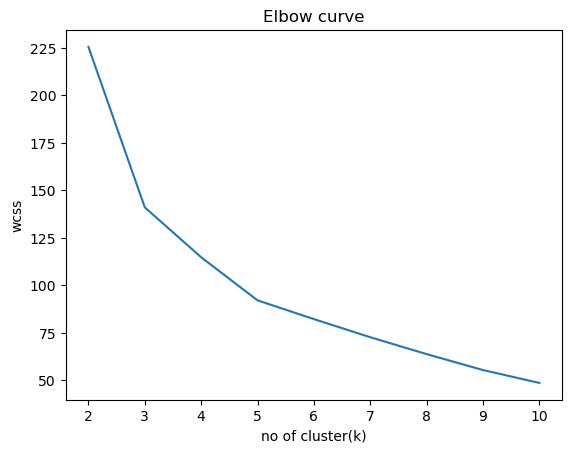

In [76]:
wcss=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=20)
    model.fit(x)
    wcss.append(model.inertia_)
plt.plot(range(2,11),wcss)
plt.title('Elbow curve')
plt.xlabel('no of cluster(k)')
plt.ylabel('wcss')

In [77]:
wcss

[225.50046206211442,
 141.06688377407846,
 114.82880681387994,
 92.15342859045302,
 82.29541504498772,
 72.74855093311186,
 63.86535212246592,
 55.48098553300095,
 48.709326122664]

In [81]:
# clearly from elbow method the optimal value for k is 3
model=KMeans(n_clusters=3,random_state=10)
model.fit(x)

KMeans(n_clusters=3, random_state=10)

In [82]:
silhouette_score(x,model.labels_)

0.461588416586402

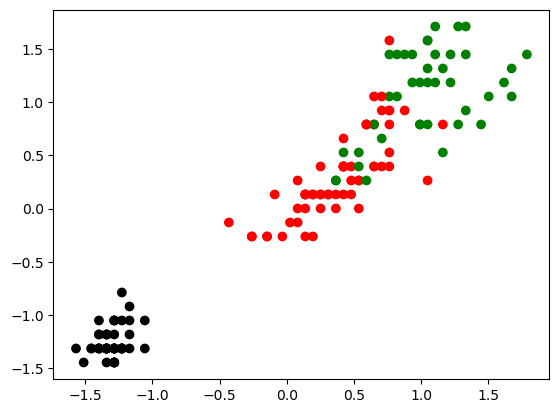

In [83]:
plt.scatter(x.petal_length,x.petal_width,color=color_schema[model.labels_])